In [16]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

data = []
directory = r'C:\Users\Hans\omni.replicator_out\replicator_pallets_random_new\bbox2D_txt'
#directory = r'D:\code\DATA\LOCO_YOLOv6_BBOX\labels\train'
IMG_SIZE = 1280

for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as file:
            lines = file.readlines()
            for line in lines:
                values = line.strip().split()
                class_id, x_center, y_center, width, height = map(float, values)
                width *= IMG_SIZE
                height *= IMG_SIZE
                area = width * height  # calculate area
                data.append([class_id, x_center, y_center, width, height, area])

columns = ['class_id', 'x_center', 'y_center', 'width', 'height', 'area']
df = pd.DataFrame(data, columns=columns)

filtered_df = df[df['class_id'] == 6]

# The rest of the code is the same as above

print(filtered_df.describe(percentiles=[.05, .25, .5, .75, .90, .95]))

width_05, width_95 = filtered_df['width'].quantile([0.05, 0.95])
height_05, height_95 = filtered_df['height'].quantile([0.05, 0.95])

# Filtering the data
filtered_df = filtered_df[(filtered_df['width'] >= width_05) & (filtered_df['width'] <= width_95) & 
                 (filtered_df['height'] >= height_05) & (filtered_df['height'] <= height_95)]

print(filtered_df.describe(percentiles=[.05, .25, .5, .75, .90, .95]))

       class_id     x_center     y_center        width       height  \
count    5476.0  5476.000000  5476.000000  5476.000000  5476.000000   
mean        6.0     0.496584     0.474832     0.085063     0.027427   
std         0.0     0.238181     0.066016     0.056571     0.029730   
min         6.0     0.002344     0.245312     0.003906     0.002344   
5%          6.0     0.091699     0.366406     0.025781     0.007812   
25%         6.0     0.316309     0.428906     0.049219     0.012500   
50%         6.0     0.498047     0.468750     0.069531     0.018750   
75%         6.0     0.679297     0.524609     0.105469     0.032031   
90%         6.0     0.811719     0.544531     0.151562     0.053125   
95%         6.0     0.904395     0.565625     0.183789     0.074219   
max         6.0     0.997266     0.788672     0.621094     0.435937   

              area  
count  5476.000000  
mean      0.003700  
std       0.011157  
min       0.000063  
5%        0.000269  
25%       0.000603  


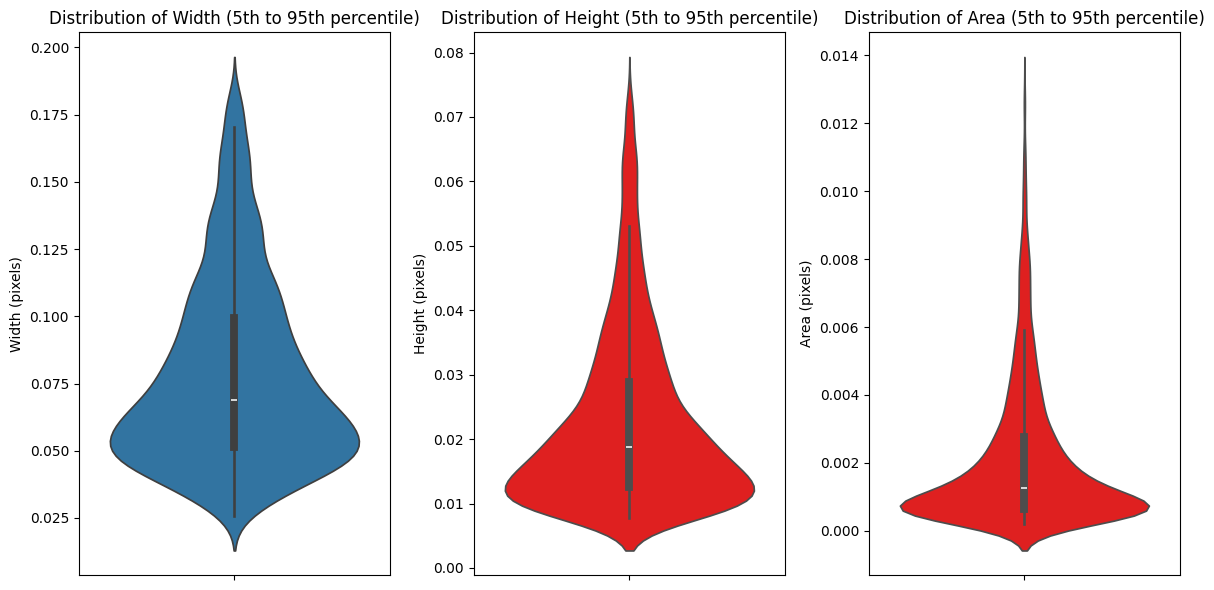

In [17]:
# Now plot the filtered data
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.violinplot(y=filtered_df['width'])
plt.ylabel('Width (pixels)')
plt.title('Distribution of Width (5th to 95th percentile)')

plt.subplot(1, 3, 2)
sns.violinplot(y=filtered_df['height'], color='r')
plt.ylabel('Height (pixels)')
plt.title('Distribution of Height (5th to 95th percentile)')
2
plt.subplot(1, 3, 3)
sns.violinplot(y=filtered_df['area'], color='r')
plt.ylabel('Area (pixels)')
plt.title('Distribution of Area (5th to 95th percentile)')

plt.tight_layout()
plt.show()

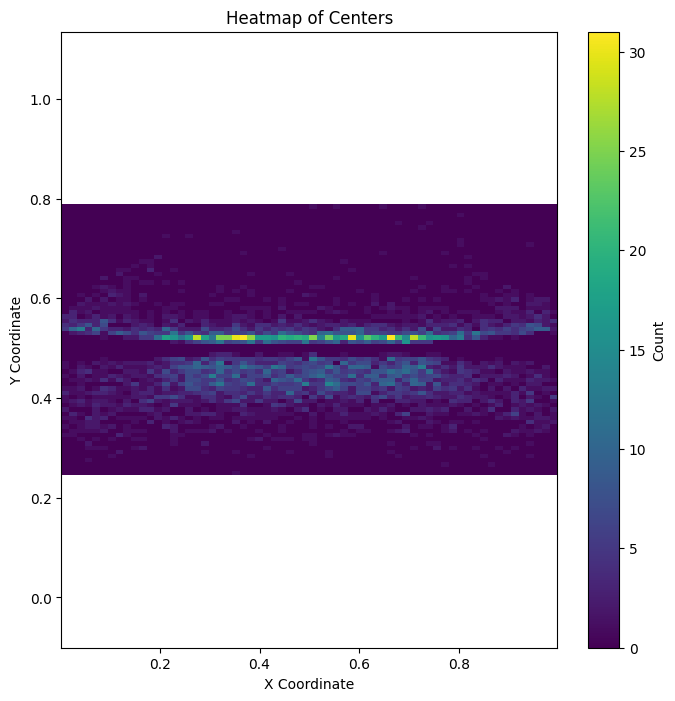

In [18]:
# Assuming df is your DataFrame and you have already filtered it as necessary
plt.figure(figsize=(8, 8))
plt.hist2d(df['x_center'], df['y_center'], bins=(64, 64))
plt.colorbar(label='Count')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Heatmap of Centers')
plt.axis('equal')  # This ensures that the scale of x and y is the same, so circles don't become ellipses
plt.show()